In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import urllib.request, json 
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%matplotlib inline


NAT_JSON_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json"
NAT_TXT_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

with urllib.request.urlopen(NAT_JSON_URL) as url:
	data = json.loads(url.read().decode())

df = pd.DataFrame.from_dict(data)
#pd.DataFrame(df, columns = ("nuovi_attualmente_positivi"));
df2 = df['deceduti']
nuovi_deceduti = df2.diff(periods=1);
nuovi_deceduti[0]=0

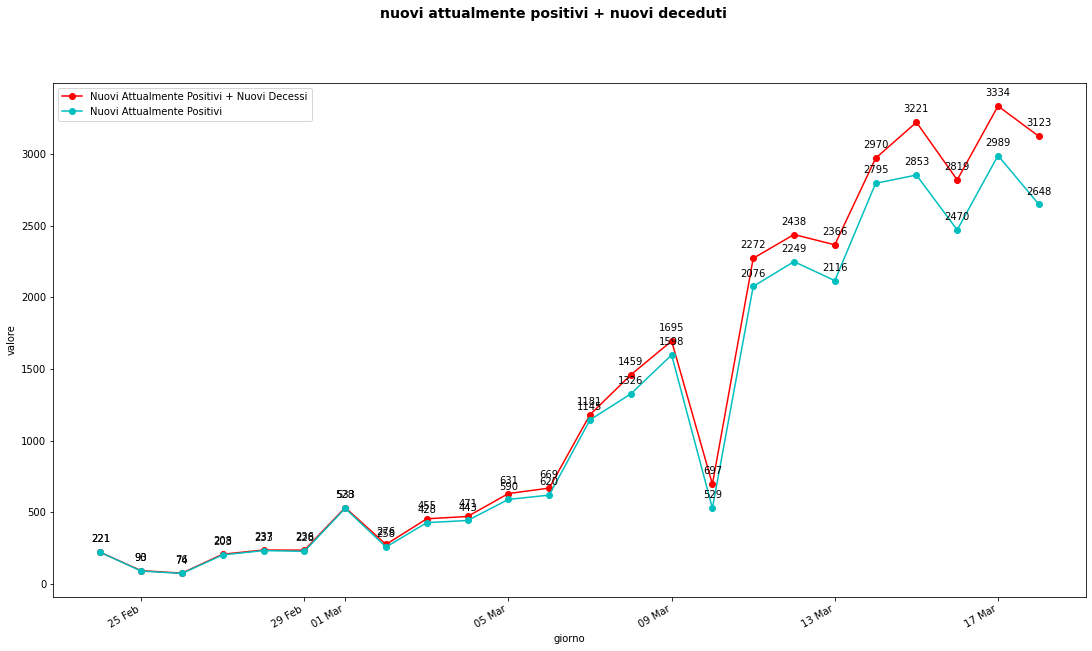

In [3]:
myDates = [datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S").date() for d in df['data']]
myValues_NAP_ND = [int(x)+int(y) for x,y in zip(df['nuovi_attualmente_positivi'], nuovi_deceduti)]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('nuovi attualmente positivi + nuovi deceduti', fontsize=14, fontweight='bold')
ax.set_xlabel('giorno',
                      horizontalalignment='center')
ax.set_ylabel('valore')

#plt.figure(figsize=(1,1))

ax.plot(myDates, myValues_NAP_ND,'ro-', label="Nuovi Attualmente Positivi + Nuovi Decessi")

myFmt = DateFormatter("%d %b")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

# zip joins x and y coordinates in pairs
for x,y in zip(myDates, myValues_NAP_ND):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# second series
ax.plot(myDates, df['nuovi_attualmente_positivi'], "co-", label="Nuovi Attualmente Positivi")
# zip joins x and y coordinates in pairs
for x,y in zip(myDates, df['nuovi_attualmente_positivi']):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax.legend()

plt.show()


In [4]:
REG_JSON_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-regioni.json"
PROV_JSON_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-province.json"

with urllib.request.urlopen(REG_JSON_URL) as url:
	data_reg = json.loads(url.read().decode())

df_reg = pd.DataFrame.from_dict(data_reg)


In [9]:
#df_reg[df_reg['denominazione_regione'] == "Lombardia"]
last_date = df_reg.max()['data']

In [10]:
df_reg[df_reg['data'] == last_date]

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
483,2020-03-18 17:00:00,ITA,13,Abruzzo,42.351222,13.398438,99,41,140,109,249,33,7,7,263,2054
484,2020-03-18 17:00:00,ITA,17,Basilicata,40.639471,15.805148,9,2,11,16,27,7,0,0,27,262
485,2020-03-18 17:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,79,18,97,269,366,84,1,9,376,2844
486,2020-03-18 17:00:00,ITA,18,Calabria,38.905976,16.594402,45,11,56,70,126,14,2,1,129,1668
487,2020-03-18 17:00:00,ITA,15,Campania,40.839566,14.250850,127,24,151,272,423,0,28,9,460,2685
488,2020-03-18 17:00:00,ITA,8,Emilia Romagna,44.494367,11.341721,1784,247,2031,1884,3915,511,152,458,4525,15461
489,2020-03-18 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,128,27,155,261,416,69,15,31,462,4958
490,2020-03-18 17:00:00,ITA,12,Lazio,41.892770,12.483667,374,44,418,232,650,100,42,32,724,11145
491,2020-03-18 17:00:00,ITA,7,Liguria,44.411493,8.932699,401,100,501,243,744,83,70,73,887,2912
492,2020-03-18 17:00:00,ITA,3,Lombardia,45.466794,9.190347,7285,924,8209,4057,12266,171,3488,1959,17713,48983
